# Digital Image processing : Assignment 1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1
 (30 points) Pixel Manipulation
1. Write a function that takes a color image and finds the most frequently occurring
color from the image. (10 points)
2. Write a function mergeImage which takes two images fg and bg that extracts the
foreground object and places it in the background and returns the resultant image.
(15 points)
3. Try out with different foreground and background images of your choice and show
the results. (5 points)

### 1.1 Function that takes an image as argument and returns the most frequently occurring colour

The most frequent colour is [5 4 2]


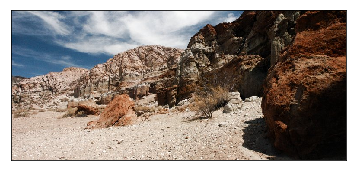

In [2]:
def most_freq_colour(im):
    dims = im.shape
    im = np.reshape(im,(dims[0]*dims[1],3))
    op = np.unique(im,axis=0,return_counts=True)
    print("The most frequent colour is",op[0][np.argmax(op[1])][::-1])

test_image = cv2.imread("../input_data/canyon.png")
most_frequent  = most_freq_colour(test_image)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.xticks([]), plt.yticks([]) 
plt.show()


### 1.2 Function that takes fg and bg as arguments and returns merged image

In [3]:
def mergeImage(fg,bg):
    dims = fg.shape
    op = np.zeros((dims[0],dims[1],3), np.uint8)
    for i in range(dims[0]):
        for j in range(dims[1]):
            if(fg[i,j,1]>=210 and fg[i,j,0]<200 and fg[i,j,2]<200):
                op[i,j] = bg[i,j]
            else:
                op[i,j] = fg[i,j]
    return op            

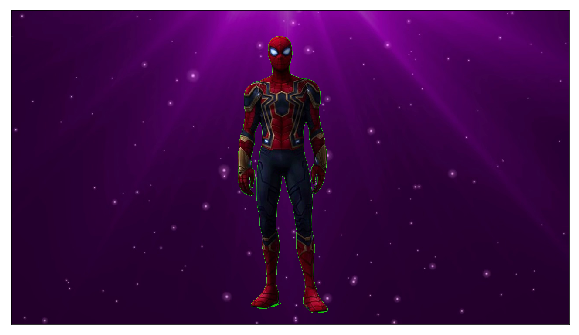

In [4]:
# Testing on provided images

fg = cv2.imread("../input_data/fg.jpg")
bg = cv2.imread("../input_data/bg.jpg")

changed_back = mergeImage(fg,bg)
cv2.imwrite('../output_data/q1fgbg1.jpg',changed_back)    

changed_back = cv2.cvtColor(changed_back, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(changed_back)
plt.xticks([]), plt.yticks([]) 
plt.show()

### 1.3 Testing on an image and background of our choice

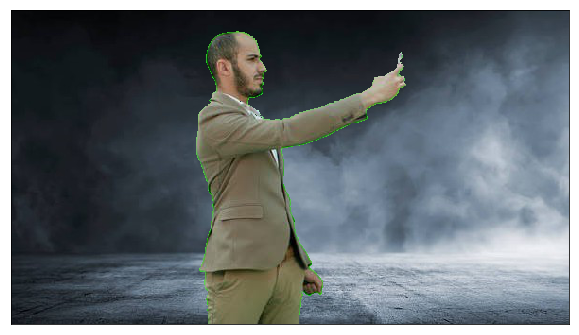

In [5]:
fg = cv2.imread("../input_data/fg1.jpg")
bg = cv2.imread("../input_data/bg1.jpg")

changed_back = mergeImage(fg,bg)
cv2.imwrite('../output_data/q1fgbg2.jpg',changed_back)

changed_back = cv2.cvtColor(changed_back, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(changed_back)
plt.xticks([]), plt.yticks([]) 
plt.show()

## Question 2
(15 points) Contrast Stretching
1. Write a function linContrastStretching which takes a grayscale image im, a and
b that enhances the contrast such that the resulting intensity range is [a; b] . (5
points)
2. Display the input image and the resultant image side-by-side along with their
colorbars (a strip containing k most frequently occurring colors). Give suitable
explanation for the resulting colorbars. (5 points)
3. Use your function on multiple images and argue why the effect is more on some
images while it is not that apparent on the others. (5 points)

In [6]:
# 2.1 takes an image im and stretches contrast from [min(im),max(im)] to [a,b]
def linContrastStretching(im,a,b):
    op = im
    minimg = np.amin(im)
    maximg = np.amax(im)
    factor = float(b-a)/float(maximg-minimg)
    op = np.around(float(factor)*(op-minimg)+a,0)
    op = op.astype(int)
    return op

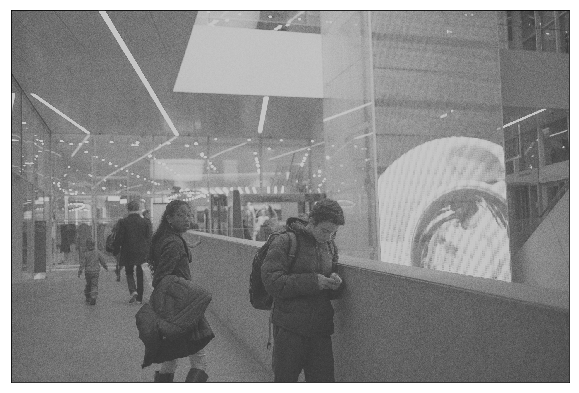

In [7]:
og_image = cv2.imread("../input_data/contrast.jpg")
op_image = linContrastStretching(og_image,50,200)
cv2.imwrite('../output_data/contrast_stretched.jpg',op_image) 
plt.figure(figsize = (10,10))
plt.imshow(op_image)
plt.xticks([]), plt.yticks([]) 
plt.show()

The 5 most frequent colours:
[[115 115 115]
 [120 120 120]
 [116 116 116]
 [117 117 117]
 [119 119 119]]


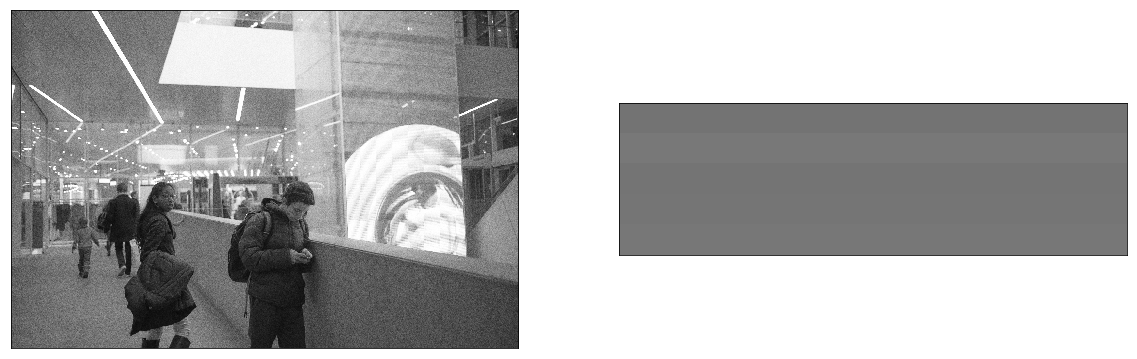

The 5 most frequent colours:
[[116 116 116]
 [119 119 119]
 [118 118 118]
 [121 121 121]
 [115 115 115]]


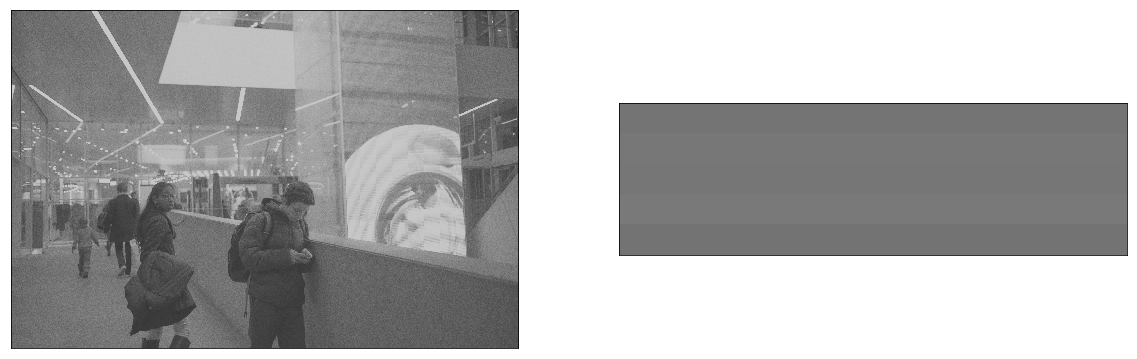

In [8]:
# 2.2 take an image and display k most frequent colours as colorbars
def colorbars(k,im):
    dims = im.shape
    op = np.reshape(im,(dims[0]*dims[1],3))
    op = np.unique(op,axis=0,return_counts=True)
    indices = np.argsort(op[1])
    width = 3
    colorbar = np.empty([width*k,10,3])
    print("The",k,"most frequent colours:")
    print(op[0][indices[::-1][:k]])
    for index,row in enumerate(op[0][indices[::-1][:k]]):
        colorbar[index*width:(index+1)*width,:,:] = row
    fig = plt.figure(figsize=(20,20))
    fig.add_subplot(1,2,1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(im)
    fig.add_subplot(1,2,2)
    colorbar = colorbar.astype(int)
    plt.xticks([]), plt.yticks([])
    plt.imshow(colorbar,aspect=float(1.0/float(k)))
    plt.show()
    
colorbars(5,og_image)   
colorbars(5,op_image)    

`The effect wont be apparent on images with values already distributed over the given range.`

# Question 3
(30 points) Bits Manipulation
1. Write a function BitQuantizeImage which takes an 8-bit image im and k, the
number of bits to which the image needs to be quantized to and returns the k-bit
quantized image. Display results for the image quantize.jpg (10 points)
2. Write a code to display different bit planes of an 8-bit gray-scale image. Display
results for the image cameraman.png (5 points)
3. Given original image lena.jpg identify the operations applied on the images lena1.jpg,
lena2.jpg and lena3.jpg. (15 points)

In [9]:
# 3.1 Takes an image and quantizes it to k bits. (Left shifted to increase brightness).
def bitQuantizeImage(im,k):
    im = np.right_shift(im,8-k)
    im = np.left_shift(im,8-k)
#     im = im.astype(np.uint8)
    return im

In [10]:
og_image = cv2.imread("../input_data/quantize.jpg")
og_image = og_image.astype(np.uint8)
op_img = bitQuantizeImage(og_image,2)
cv2.imwrite('../output_data/quant_4.jpg',op_img)

True

In [11]:
# 3.2 Function takes an 8 bit image as input and displays all its bit planes
def display_all_planes(im):
    fig = plt.figure(figsize=(10,10))
    rows = 4
    cols = 2
    ax = []
    for i in range(8):
        op = np.bitwise_and(im,np.left_shift(1,i))*255
        ax.append( fig.add_subplot(rows, cols, i+1) )
        plt.axis("off")
        ax[-1].set_title("Bit plane :"+str(i))  # set title
        plt.imshow(op)
    plt.show()    

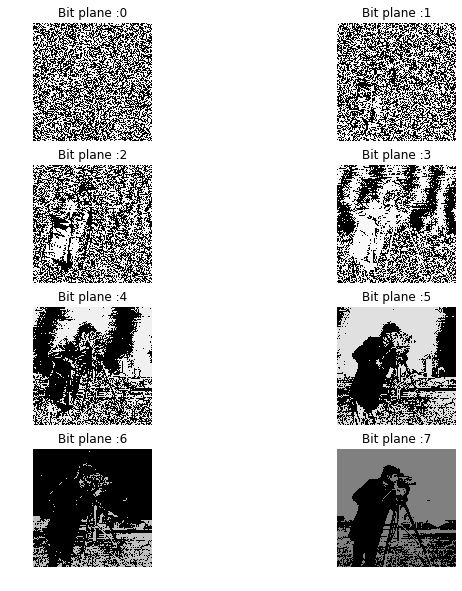

In [12]:
og_image = cv2.imread("../input_data/cameraman.png")
og_image = og_image.astype(np.uint8)
display_all_planes(og_image)

In [13]:
# Trying to identify the operation used to get lena1, lena2 and lena3 from lena. 
# Outputs after applying operations on lena have been saved in the output_data folder with names: 
# try_lena1,try_lena2, try_lena3 . 

lena = cv2.imread("../input_data/lena.jpg")
lena = lena.astype(np.uint8)
lena1 = cv2.imread("../input_data/lena1.jpg")
lena1 = lena1.astype(np.uint8)
lena2 = cv2.imread("../input_data/lena2.jpg")
lena2 = lena2.astype(np.uint8)
lena3 = cv2.imread("../input_data/lena3.jpg")
lena3 = lena3.astype(np.uint8) 

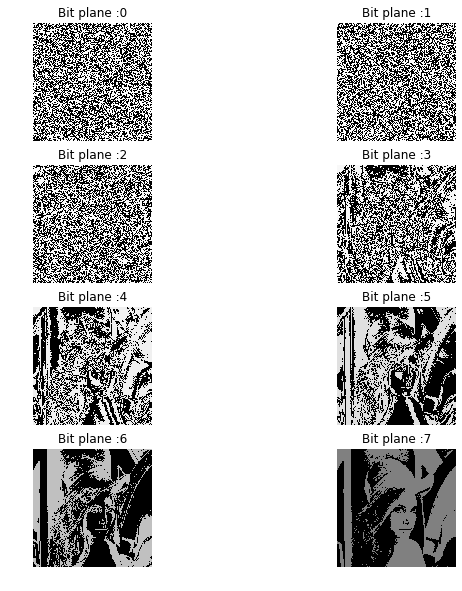

True

In [14]:
# lena1.jpg looks similar to some bitplane output(taking idea from previous example on cameraman.png)
display_all_planes(lena)
# In this we observe that bit plane 4 looks most similar to lena1.jpg, so we extract the 5th bit position/plane  
try1 = np.bitwise_and(lena,np.left_shift(1,4))*255
cv2.imwrite('../output_data/try_lena1.jpg',try1)

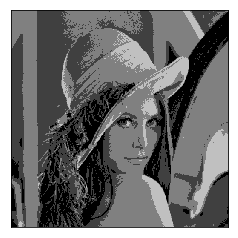

In [15]:
# lena2.jpg is a quantized image with around 4 colours so could have a bit quantization of 2.
# Using the bit quantization function we wrote,lena2.jpg was formed by quantizing lena.jpg to 2 bits :
try2 = bitQuantizeImage(lena,2)
cv2.imwrite('../output_data/try_lena2.jpg',try2)
plt.imshow(try2)
plt.xticks([]), plt.yticks([]) 
plt.show()

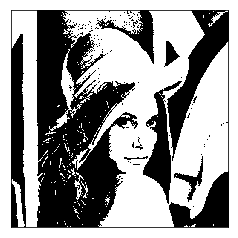

In [16]:
# lena3.jpg is a quantized image with only 2 colours so must have a bit quantization of 1.
# Using the bit quantization function we wrote,lena3.jpg was formed by quantizing lena.jpg to 1 bit
# (making the ones to 255) and rest zeroes: :
try3 = bitQuantizeImage(lena,1)
try3[try3>0]=255 # binary so taking values from 128->255
cv2.imwrite('../output_data/try_lena3.jpg',try3)
plt.imshow(try3)
plt.xticks([]), plt.yticks([]) 
plt.show()

## Question 4
(40 points) Intensity Transformation
1. Write a function to create the negative of an image. The function should take the
image and maximum intensity as arguments. Produce the transformed output for
first 8 k-bit quantized forms of lena.jpg. (10 points)
2. Using the image gamma-corr.png, apply the Gamma Transform s = rγ and vary γ.
Report your observations. (15 points)
3. Write a function to implement a piecewise linear transform g(z) = K1i · z + K2i;
ai ≤ z ≤ bi. The function takes an input image, coefficients K1,K2 and intervals a,b for each linear segment and produces the transformed output image. Produced
transformed outputs of lena.jpg for the following functions: (15 points)
![alt text](../input_data/q4.png "")


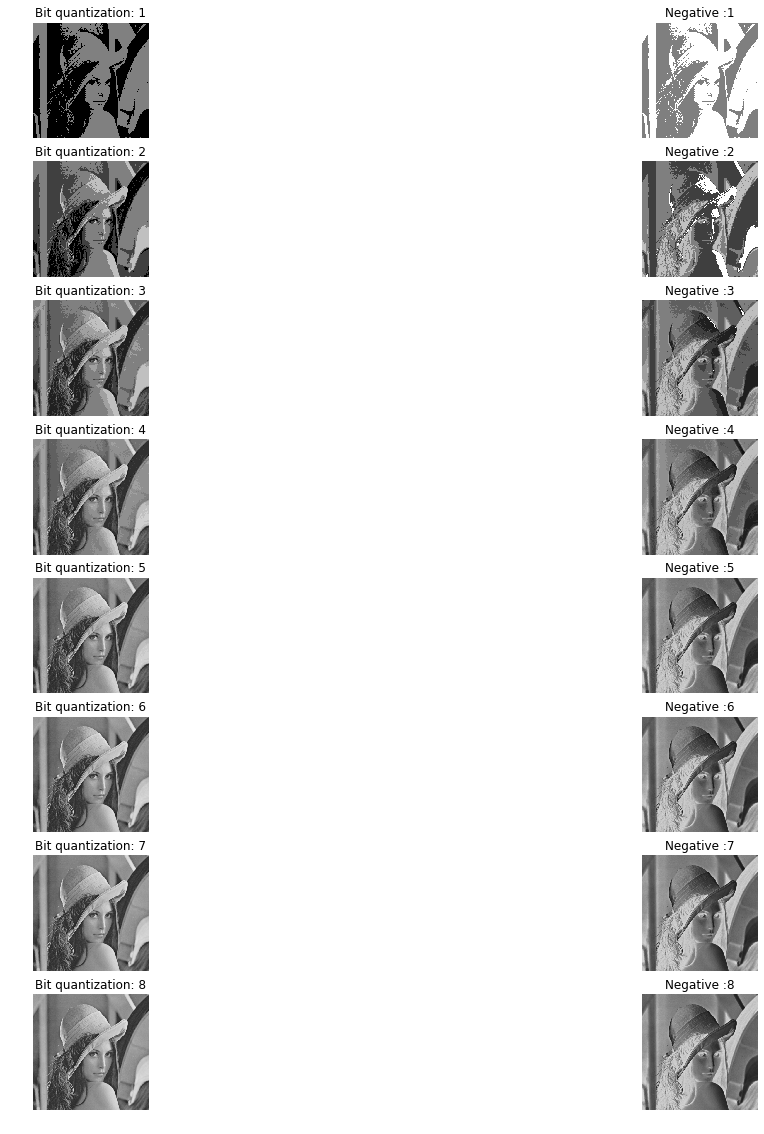

In [17]:
# 4.1 function negative_image() returns the transformed image using the formula T(r) = L-1-r 
# where L is the max intensity passed as argument to the function

def negative_image(im,maxi):
    return maxi-1-im

fig = plt.figure(figsize=(20,20))
rows = 8
cols = 2
ax = []
maxval = 0
for i in range(8):
    op = bitQuantizeImage(lena,i+1)
    ax.append( fig.add_subplot(rows, cols, 2*i+1) )
    plt.axis("off")
    ax[-1].set_title("Bit quantization: "+str(i+1))  # set title
    plt.imshow(op)
    
    maxval+=2**(7-i)
    op = negative_image(op,maxval)
    ax.append( fig.add_subplot(rows, cols, 2*i+2) )
    plt.axis("off")
    ax[-1].set_title("Negative :"+str(i+1))  # set title
    plt.imshow(op)
    
plt.show()    
    

In [18]:
# 4.2 Gamma Transformation function
def gammaTransform(im,y,c):
    im = im.astype(float)/255
    return np.round(c*(im**y)).astype(np.uint8)*255

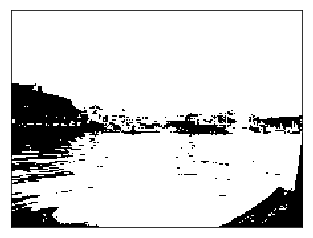

In [19]:
gam = cv2.imread("../input_data/gamma-corr.png")
gam = gam.astype(np.uint8)
gam_p4_10 = gammaTransform(gam,0.4,1)
cv2.imwrite('../output_data/gam_p4_10.png',gam_p4_10)
plt.imshow(gam_p4_10)
plt.xticks([]), plt.yticks([]) 
plt.show()

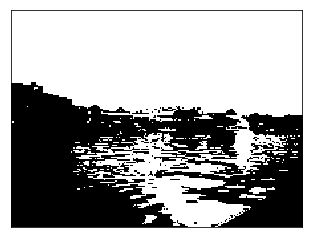

In [20]:
gam_p67_1 = gammaTransform(gam,0.67,1)
cv2.imwrite('../output_data/gam_p67_1.png',gam_p67_1)
plt.imshow(gam_p67_1)
plt.xticks([]), plt.yticks([]) 
plt.show()

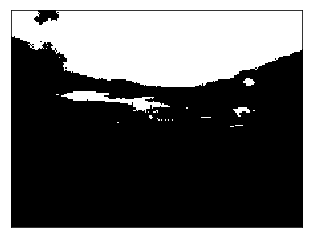

In [21]:
gam_2p5_1 = gammaTransform(gam,1.5,1)
cv2.imwrite('../output_data/gam_2p5_1.png',gam_2p5_1)
plt.imshow(gam_2p5_1) 
plt.xticks([]), plt.yticks([]) 
plt.show()

In [22]:
def piecewise_linear_transform(im,k1,k2,a,b):
    dims = im.shape
    im = im.astype(float)/255
    op = im
    for i in range(dims[0]):
        for j in range(dims[1]):
            for p in range(len(a)):
                if(im[i,j,0]>=a[p] and im[i,j,0]<b[p]):
                    op[i,j] = np.round((im[i,j,0]*k1[p]+k2[p])*255)
                    break
    return op.astype(np.uint8)    

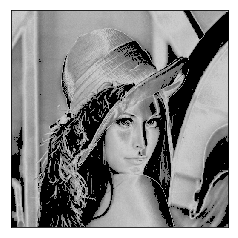

In [23]:
lena = cv2.imread("../input_data/lena.jpg")
op_lena1 = piecewise_linear_transform(lena,[0,1.33,-2,0],[0,0,2,0],[0.0,0.3,0.6,0.8],[0.3,0.6,0.8,1.0])
cv2.imwrite('../output_data/op_lena1.jpg',op_lena1)
plt.imshow(op_lena1) 
plt.xticks([]), plt.yticks([]) 
plt.show()

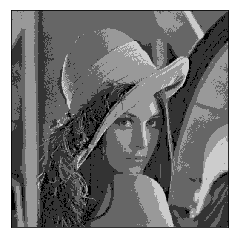

In [24]:
op_lena2 = piecewise_linear_transform(lena,[0,0,0,0,0],[0,0.2,0.4,0.6,0.8],[0.0,0.2,0.4,0.6,0.8],[0.2,0.4,0.6,0.8,1.0])
cv2.imwrite('../output_data/op_lena2.jpg',op_lena2)
plt.imshow(op_lena2) 
plt.xticks([]), plt.yticks([]) 
plt.show()

## Question 5
 (20 points) Miscellaneous
1. What can you say about the histogram of a resulting image if we keep the MSB
bits in the bitplane to 0? (5 points)
2. What can you say about the histogram of a resulting image if we keep the LSB bits
in the bitplane to 0? (5 points)
3. Transmission is usually achieved through packets containing a start bit, a byte
of information and a stop bit. Baud rate is a common measure for digital data
transmission and is defined as number of bits transmitted per second. How much
time would it take to transmit 512 x 512 grayscale image with intensity 0-255 over
a 56K baud link? Similarly, calculate the time required to transmit the same image
over a 3000K baud link. (10 points)

### `5.1`
`The histogram of the resulting image will have values ranging from 0 to 127, bins in the range 128-255 will have zero value, no pixels will have those values` 
### `5.2`
`The histogram of the resulting image will have only even values,odd pixel values not possible` 
### `5.3`
`Total no. of bits involved in transmitting a 512x512 grayscale image: 512 * 512 * 8 bits (to transmit the image) + 512 * 512 * 2(as start and end bits) = 512 * 512 * 10 bits` <br/>
`Case 1 : Baud rate 56K bits/s
Time taken to transmit the grayscale image = (2621440 bits)/ (56000 bits/s) = 46.8114285714 s` <br/>
`Case 2 : Baud rate 3000K bits/s
Time taken to transmit the grayscale image = (2621440 bits)/ (3000000 bits/s) = 0.87381333333 s`

## Question 6
(35 points) Histogram Equalization and Matching
1. Write a function histEqualization which takes a grayscale image im, and applies
histogram equalization on the entire image. (10 points)
2. Display the input image and the resultant image side-by-side and provide suitable
explanation for the changes you observe for multiple input images. (5 points)
3. Write a function histMatching which takes an input image and a reference image
and applies histogram Matching on the input image by matching the histogram with
that of the reference image. Use eye.png and eyeref.png (converted to grayscale)
as the input and reference images respectively. (10 points)
4. You are provided with 4 images (part1.png, part2.png, part3.png, part4.png)
with different contrast levels which correspond to four quadrants of canyon.png as
shown in Figure 5. Retrieve the original image(converted to grayscale) using these
four images(converted to grayscale) as closely as possible. (10 points)

In [25]:
# 6. 1 Histogram equalization function
def histEqualization(im):
    img = np.asarray(im)
    flat = img.flatten()
    histogram = np.zeros(256)    
    for pixel in flat:
        histogram[pixel] += 1
    histogram = iter(histogram)
    b = [next(histogram)]
    for i in histogram:
        b.append(b[-1] + i)    
    cs = np.array(b)
    nj = (cs - cs.min())
    N = cs.max() - cs.min()
    cs = (nj / N)*255
    cs = cs.astype('uint8')
    img_new = cs[flat]
    img_new = np.reshape(img_new, img.shape)
    return img_new.astype(np.uint8)

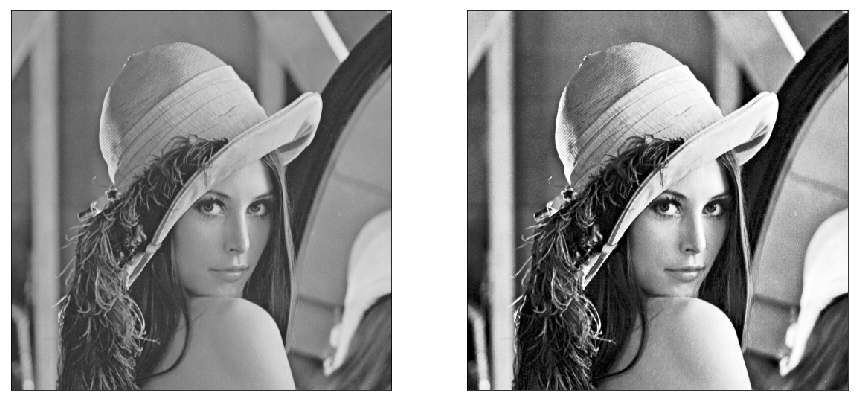

In [26]:
lena = cv2.imread("../input_data/lena.jpg")
lena = lena.astype(np.uint8)    
op = histEqualization(lena)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.imshow(lena, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(op, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show(block=True)

### 6.2
`The original image had more gray intensity values, now the image has all values from black to white, more contrast; because the histogram is equalized`

In [27]:
# 6.3 Histogram matching function
def hist_match(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    return interp_t_values[bin_idx].reshape(oldshape)

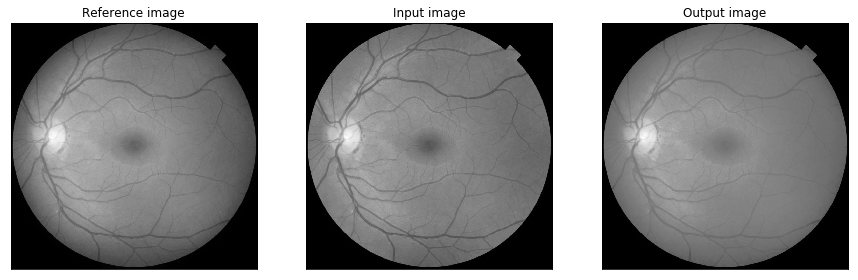

In [28]:
eye = cv2.imread("../input_data/eye.png",0)
eye = eye.astype(np.uint8)
eyeref = cv2.imread("../input_data/eyeref.png",0)
eyeref = eyeref.astype(np.uint8)
op = hist_match(eye,eyeref)                       
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,3,1)
plt.xticks([]), plt.yticks([])
plt.title("Reference image")
plt.imshow(eye, cmap='gray')
fig.add_subplot(1,3,2)
plt.xticks([]), plt.yticks([])
plt.title("Input image")
plt.imshow(eyeref, cmap='gray')
fig.add_subplot(1,3,3)
plt.title("Output image")
plt.imshow(op, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show(block=True)

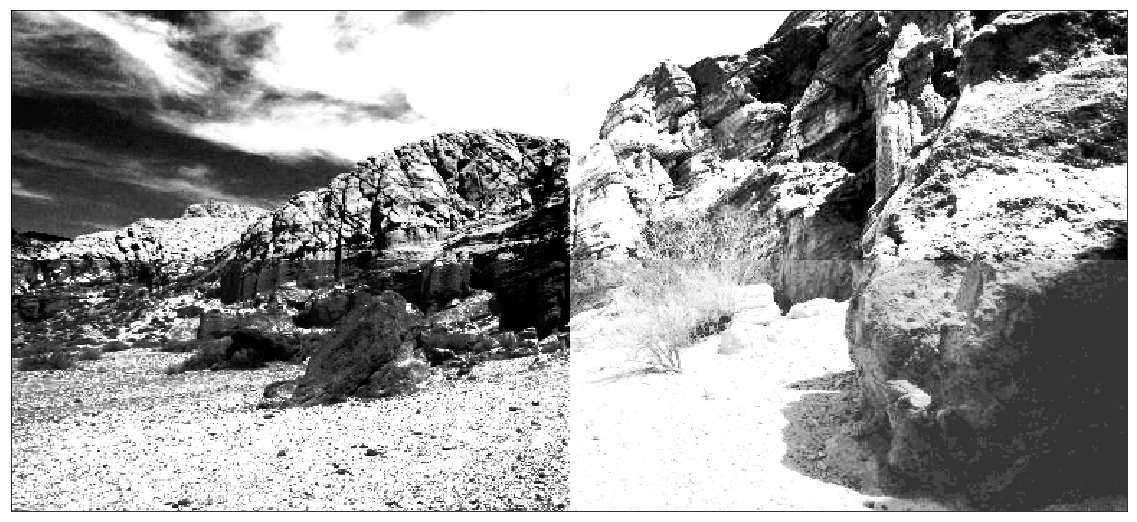

In [34]:
# 6.4 part:
part1 = cv2.imread("../input_data/part1.png",0)
part1 = part1.astype(np.uint8)
part2 = cv2.imread("../input_data/part2.png",0)
part2 = part2.astype(np.uint8)
part3 = cv2.imread("../input_data/part3.png",0)
part3 = part3.astype(np.uint8)
part4 = cv2.imread("../input_data/part4.png",0)
part4 = part4.astype(np.uint8)

op2 = hist_match(part2,part1)                       
op3 = hist_match(part3,part1)                       
op4 = hist_match(part4,part1)

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)

op = np.zeros([174*2,388+387])
op[:174,:388] = part1
op[174:,:388] = op3
op[:174,388:] = op2
op[174:,388:] = op4

plt.xticks([]), plt.yticks([])
plt.imshow(op, cmap='gray')
plt.show(block=True)


## Question 7
(30 points) Histogram Transformation
1. Choose an image of your choice and apply histogram equalization to it. Apply
histogram equalization to the resulting image and compare the two images. What
are your observations? (10 points)
2. Pick the following combination of images and perform histogram transformation on
them.(20 points)<br/>
• Similar Histograms<br/>
• Dark →Light Image<br/>
• Light →Dark Image

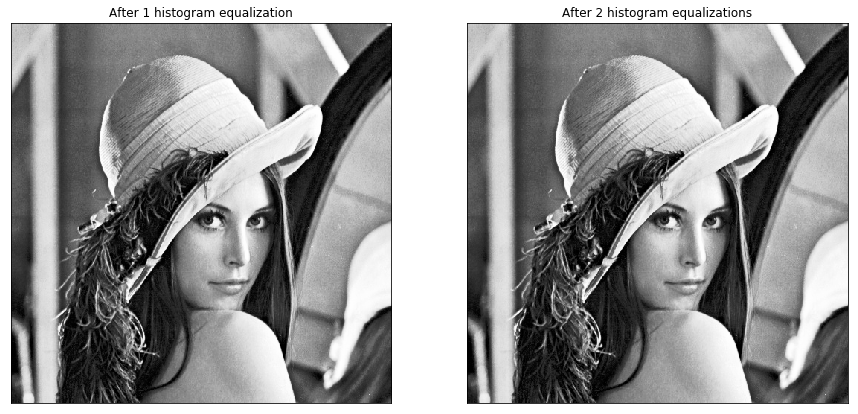

In [30]:
# 7.1 taking lena .jpg and applying histogram equalization on it once, then again on the output.
lena = cv2.imread("../input_data/lena.jpg")
lena = lena.astype(np.uint8)    
op1 = histEqualization(lena)
op2 = histEqualization(op1)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.title("After 1 histogram equalization")
plt.imshow(op1, cmap='gray')
fig.add_subplot(1,2,2)
plt.title("After 2 histogram equalizations")
plt.imshow(op2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show(block=True)

 `If histogram equalization is applied twice, there is no change. This is because a histogram equalization is idempotent. In other words, the value of the histogram equalization does not change when it is multiplied by itself.`
 `The difference seen in the above histograms is very slight, due to computational resolution`

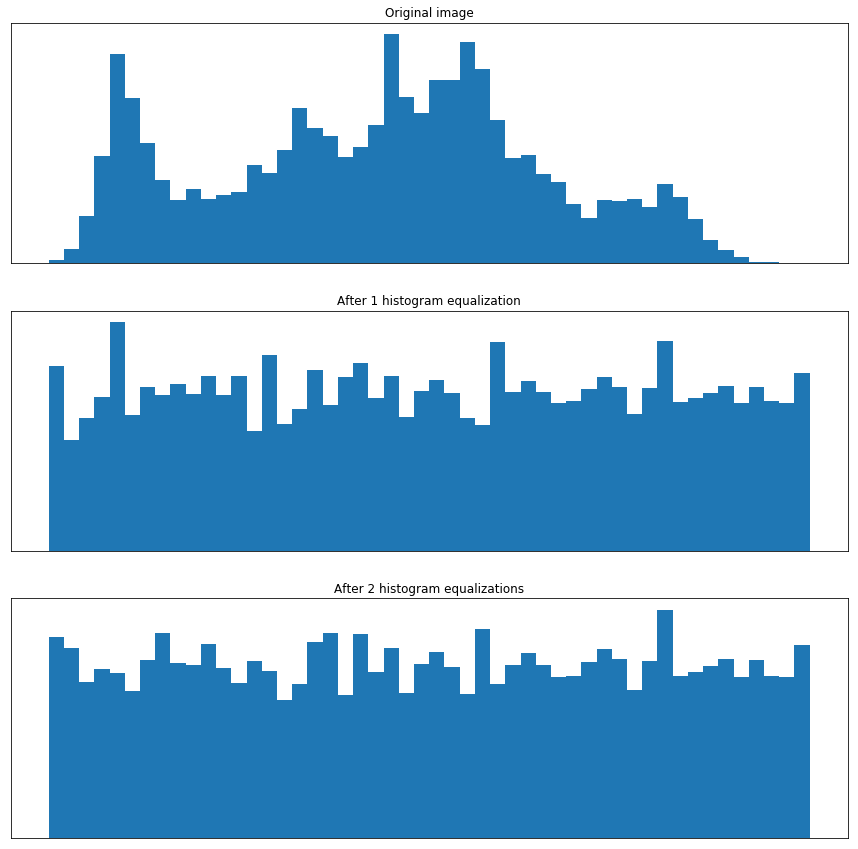

In [31]:
# put pixels in a 1D array by flattening out img array
flatog = lena.flatten()
flat1 = op1.flatten()
flat2 = op2.flatten()

# show the histogram
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(3,1,1)
plt.xticks([]), plt.yticks([])
plt.title("Original image")
plt.hist(flatog, bins=50)

fig.add_subplot(3,1,2)
plt.xticks([]), plt.yticks([])
plt.title("After 1 histogram equalization")
plt.hist(flat1, bins=50)

fig.add_subplot(3,1,3)
plt.title("After 2 histogram equalizations")
plt.hist(flat2, bins=50)
plt.xticks([]), plt.yticks([])

plt.show(block=True)

In [32]:
im1 = cv2.imread("../input_data/q7_1.jpeg",0)
im1 = im1.astype(np.uint8)  
im2 = cv2.imread("../input_data/q7_2.jpg",0)
im2 = im2.astype(np.uint8) 

### Similar histograms

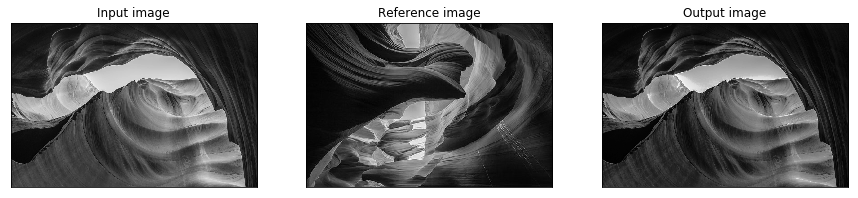

In [35]:
op = hist_match(im1,im2)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,3,1)
plt.xticks([]), plt.yticks([])
plt.title("Input image")
plt.imshow(im1, cmap='gray')
fig.add_subplot(1,3,2)
plt.xticks([]), plt.yticks([])
plt.title("Reference image")
plt.imshow(im2, cmap='gray')
fig.add_subplot(1,3,3)
plt.title("Output image")
plt.imshow(op, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show(block=True)

### Dark -> Light image

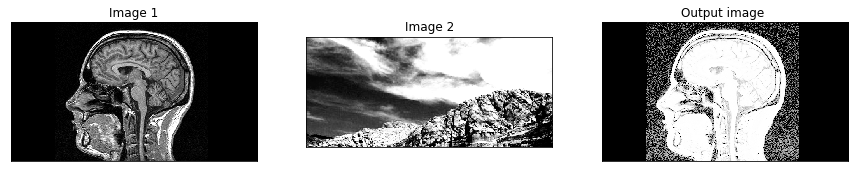

In [36]:
im1 = cv2.imread("../input_data/mri.png",0)
im1 = im1.astype(np.uint8)  
im2 = cv2.imread("../input_data/part1.png",0)
im2 = im2.astype(np.uint8) 
op = hist_match(im1,im2)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,3,1)
plt.xticks([]), plt.yticks([])
plt.title("Image 1")
plt.imshow(im1, cmap='gray')
fig.add_subplot(1,3,2)
plt.xticks([]), plt.yticks([])
plt.title("Image 2")
plt.imshow(im2, cmap='gray')
fig.add_subplot(1,3,3)
plt.title("Output image ")
plt.imshow(op, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show(block=True)

### Light -> Dark image

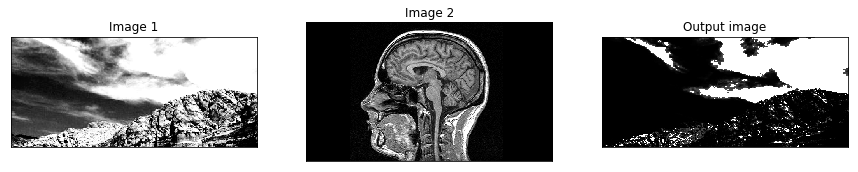

In [37]:
op = hist_match(im2,im1)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,3,1)
plt.xticks([]), plt.yticks([])
plt.title("Image 1")
plt.imshow(im2, cmap='gray')
fig.add_subplot(1,3,2)
plt.xticks([]), plt.yticks([])
plt.title("Image 2")
plt.imshow(im1, cmap='gray')
fig.add_subplot(1,3,3)
plt.title("Output image")
plt.imshow(op, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show(block=True)